<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210714.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Îî•Îü¨Îãù & Í∞ïÌôîÌïôÏäµ

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Ï¢Ä Îçî ÌÅ∞ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥Î≥¥Í∏∞
df_dataset = pd.read_csv('/content/faults.csv')
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
df_dataset.head()

X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
0         42         50     270900  ...          0      0             0
1        645        651    2538079  ...          0      0             0
2        829        835    1553913  ...          0      0             0
3        853        860     369370  ...          0      0             0
4       1289       1306     498078  ...          0      0             0

[5 rows x 34 columns]

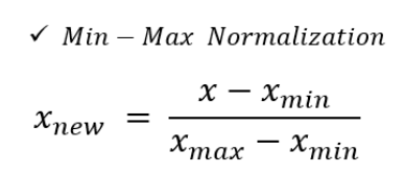

In [ ]:
faults_norm = (df_dataset - df_dataset.min()) / (df_dataset.max() - df_dataset.min())

In [ ]:
faults_norm.describe()

X_Minimum    X_Maximum  ...        Bumps  Other_Faults
count  1941.000000  1941.000000  ...  1941.000000   1941.000000
mean      0.334977     0.359254  ...     0.207110      0.346728
std       0.305390     0.291180  ...     0.405339      0.476051
min       0.000000     0.000000  ...     0.000000      0.000000
25%       0.029912     0.110006  ...     0.000000      0.000000
50%       0.255132     0.270919  ...     0.000000      0.000000
75%       0.617595     0.624927  ...     0.000000      1.000000
max       1.000000     1.000000  ...     1.000000      1.000000

[8 rows x 34 columns]

In [ ]:
faults_shuffle = faults_norm.sample(frac = 1)
print(faults_shuffle[:5])

      X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
1895   0.453372   0.466355   0.172075  ...        0.0    0.0           1.0
800    0.285044   0.286132   0.124475  ...        0.0    0.0           0.0
855    0.363050   0.366296   0.162312  ...        1.0    0.0           0.0
1577   0.380645   0.384435   0.069716  ...        0.0    0.0           1.0
1870   0.786510   0.822118   0.214732  ...        0.0    0.0           1.0

[5 rows x 34 columns]


In [ ]:
faults_np = faults_shuffle.to_numpy()
print(type(faults_np))

<class 'numpy.ndarray'>


In [ ]:
train_ratio = 0.9
input_cnt = 27
output_cnt = 7

In [ ]:
train_idx = int(len(faults_np)*train_ratio)
print(train_idx)

1746


In [ ]:
train_X, train_Y = faults_np[:train_idx, :-output_cnt], faults_np[ :train_idx, -output_cnt:]
test_X, test_Y = faults_np[train_idx: , :-output_cnt], faults_np[train_idx:, -output_cnt:]

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print('------------------------------')
print(test_X.shape)
print(test_Y.shape)

(1746, 27)
(1746, 7)
------------------------------
(195, 27)
(195, 7)


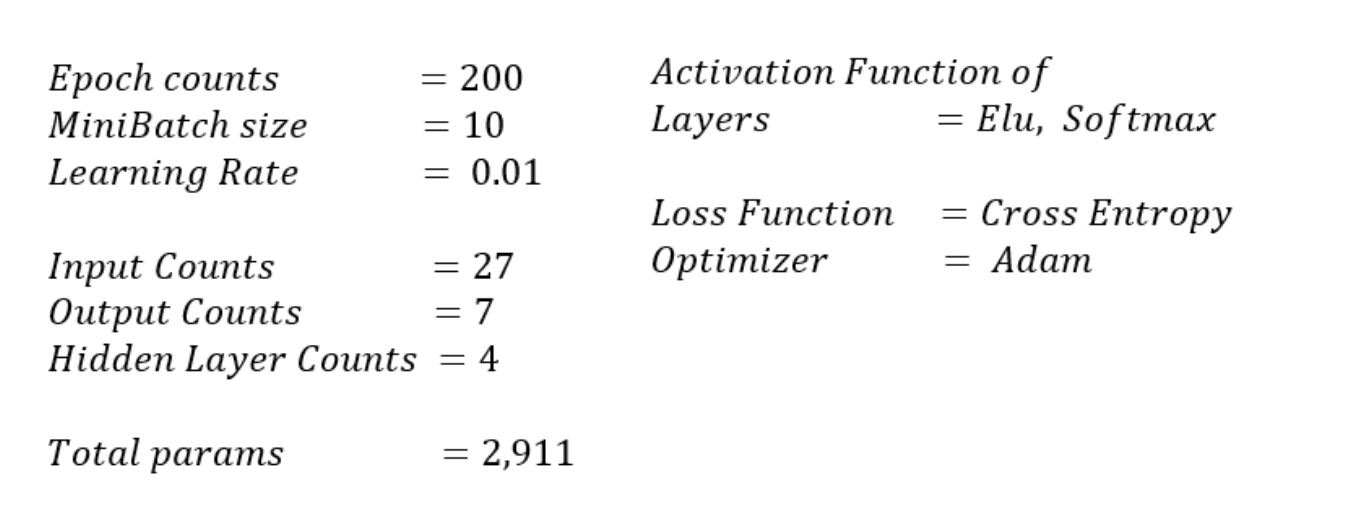

In [ ]:
multi_layer_model = tf.keras.Sequential([
                                         tf.keras.layers.Dense(units=48, activation='elu',
                                                               input_shape = (27,)),
                                         tf.keras.layers.Dense(units=24, activation='elu'),
                                         tf.keras.layers.Dense(units=12, activation='elu'),
                                         tf.keras.layers.Dense(units=7, activation='softmax')
])

In [ ]:
multi_layer_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 48)                1344      
_________________________________________________________________
dense_13 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_14 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 91        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
multi_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy')

In [ ]:
history_2 = multi_layer_model.fit(train_X, train_Y, batch_size = 10, epochs = 200)


Epoch 1/200
175/175 [==============================] - 1s 1ms/step - loss: 1.1996
Epoch 2/200
175/175 [==============================] - 0s 1ms/step - loss: 0.9574
Epoch 3/200
175/175 [==============================] - 0s 1ms/step - loss: 0.9037
Epoch 4/200
175/175 [==============================] - 0s 1ms/step - loss: 0.8138
Epoch 5/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7830
Epoch 6/200
175/175 [==============================] - 0s 2ms/step - loss: 0.7659
Epoch 7/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7510
Epoch 8/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7278
Epoch 9/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7143
Epoch 10/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7092
Epoch 11/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7244
Epoch 12/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7175
Epoch 13/200


In [ ]:
multi_layer_model.evaluate(test_X, test_Y)

7/7 [==============================] - 0s 2ms/step - loss: 1.0461


1.0461103916168213

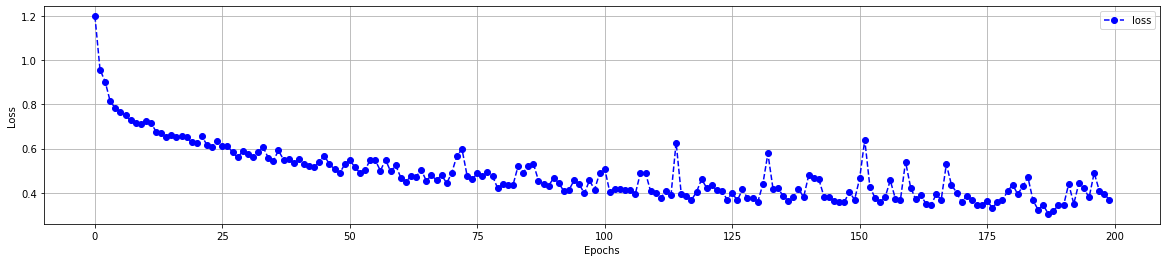

In [ ]:
plt.figure(figsize = (20,4))
plt.plot(history_2.history['loss'], 'b--o', label = 'loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pred_Y = multi_layer_model.predict(test_X)
print('pred_Y : ', pred_Y)

pred_Y :  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.3012167e-36 1.0000000e+00]
 [1.6365757e-32 2.9173873e-26 1.0000000e+00 ... 0.0000000e+00
  1.2734159e-15 2.9528123e-11]
 [1.1250347e-02 4.2934110e-04 2.0507561e-05 ... 5.2115342e-07
  4.7835982e-01 5.0991917e-01]
 ...
 [6.0651052e-01 9.0350285e-02 1.1247980e-03 ... 2.0681384e-03
  2.6560614e-01 3.4303796e-02]
 [5.8957200e-02 7.4525474e-04 5.0336341e-05 ... 2.7689042e-05
  3.8521034e-01 5.5491674e-01]
 [9.9495006e-01 2.2954692e-12 6.0291389e-10 ... 3.4699382e-10
  1.4840999e-05 4.9143829e-03]]


In [ ]:
pred_Y = np.argmax(pred_Y, axis=1)
print(pred_Y)

[6 2 6 6 2 5 5 5 6 0 5 3 6 1 6 6 5 6 5 5 6 6 2 5 0 6 5 2 5 0 3 2 6 2 6 5 6
 6 2 5 4 1 5 5 5 5 0 5 6 0 2 5 6 5 1 3 5 6 6 5 6 5 5 1 6 2 5 4 6 2 2 2 2 6
 1 6 5 6 2 6 6 2 3 5 5 2 2 6 1 2 0 5 5 2 6 5 5 6 6 6 6 6 2 2 0 2 2 6 5 6 4
 5 2 3 5 0 0 1 5 5 5 1 6 2 2 6 5 6 6 6 6 6 2 6 4 1 0 5 1 1 6 1 6 5 4 5 0 4
 5 6 6 5 5 6 2 2 6 5 2 1 2 2 2 5 6 6 2 6 6 6 1 6 5 0 2 1 5 2 6 5 2 2 6 3 2
 2 6 4 5 6 5 5 0 6 0]


In [ ]:
test_Y = np.argmax(test_Y, axis = 1)
print(test_Y)

[6 2 6 6 2 5 5 6 5 0 5 6 6 1 6 5 5 6 5 5 0 1 1 5 0 6 0 2 5 0 3 2 6 6 5 5 1
 5 2 6 0 1 6 6 6 5 0 2 6 6 2 5 6 5 1 3 5 1 5 5 6 5 5 1 6 2 5 4 6 2 2 2 2 0
 1 1 6 6 2 6 6 2 3 5 6 2 2 5 1 2 6 5 5 2 6 6 6 6 6 6 6 6 6 2 6 2 2 6 5 2 4
 5 2 3 5 0 0 6 5 6 6 1 6 2 2 5 6 0 5 6 6 6 6 6 4 1 0 5 1 1 0 1 0 5 6 6 0 6
 5 6 6 5 3 5 2 6 6 5 2 1 2 2 2 6 6 5 2 6 6 5 1 5 5 6 2 1 5 6 6 6 2 2 6 3 2
 2 1 6 5 6 5 5 0 6 6]


In [ ]:
acc = np.mean(np.equal(pred_Y, test_Y))

In [ ]:
print("Multi_layer_model ACC : {} %".format(np.round(acc * 100,3)))

Multi_layer_model ACC : 70.256 %


### abalon Îç∞Ïù¥ÌÑ∞

1.

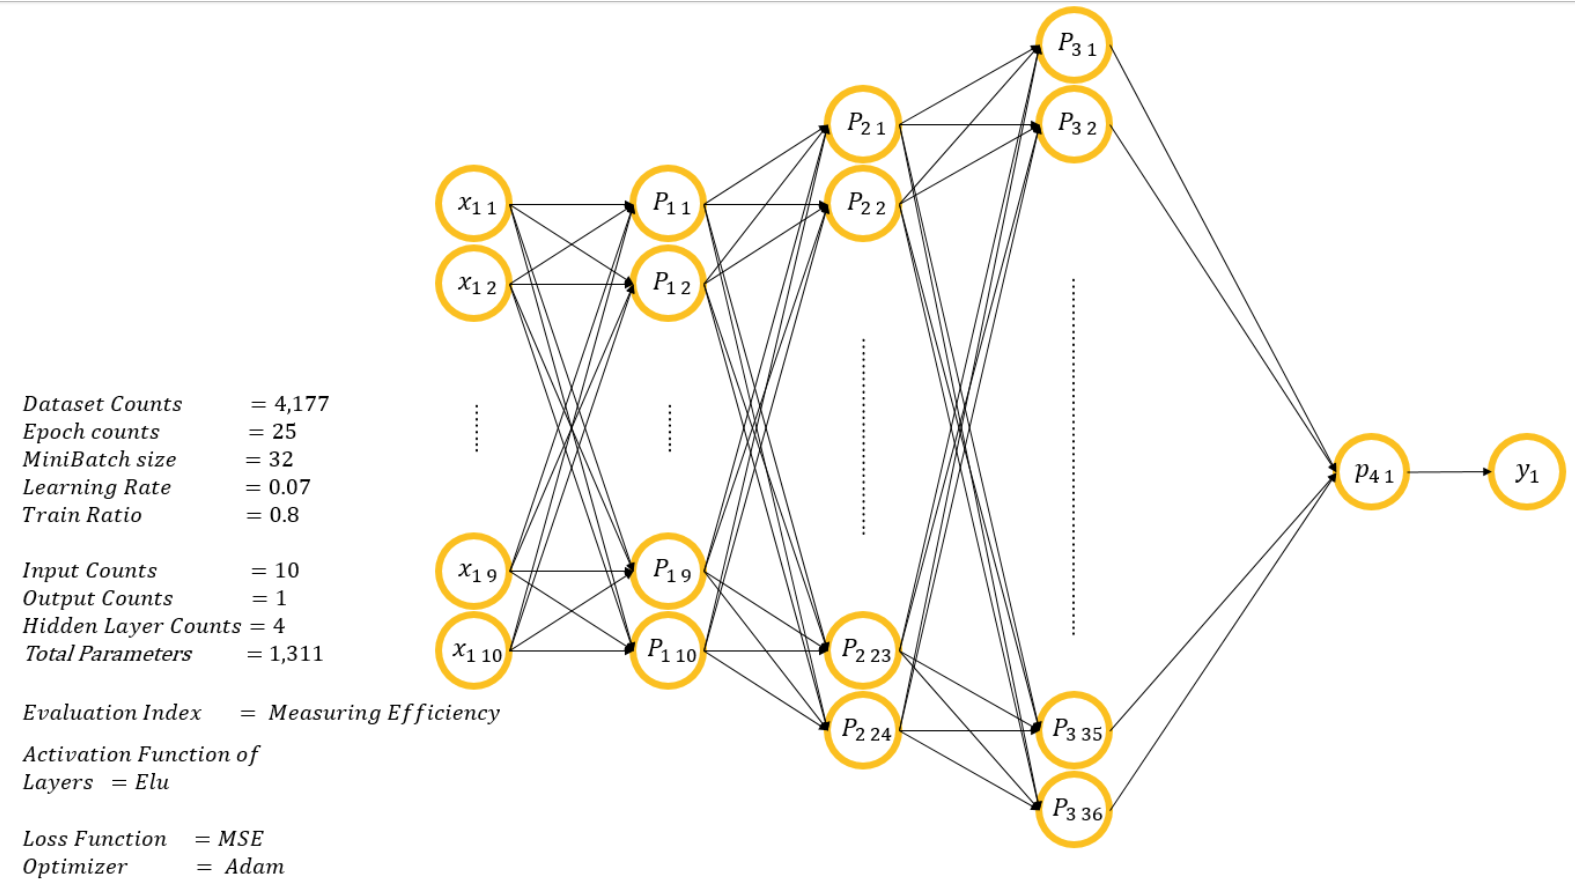

2.

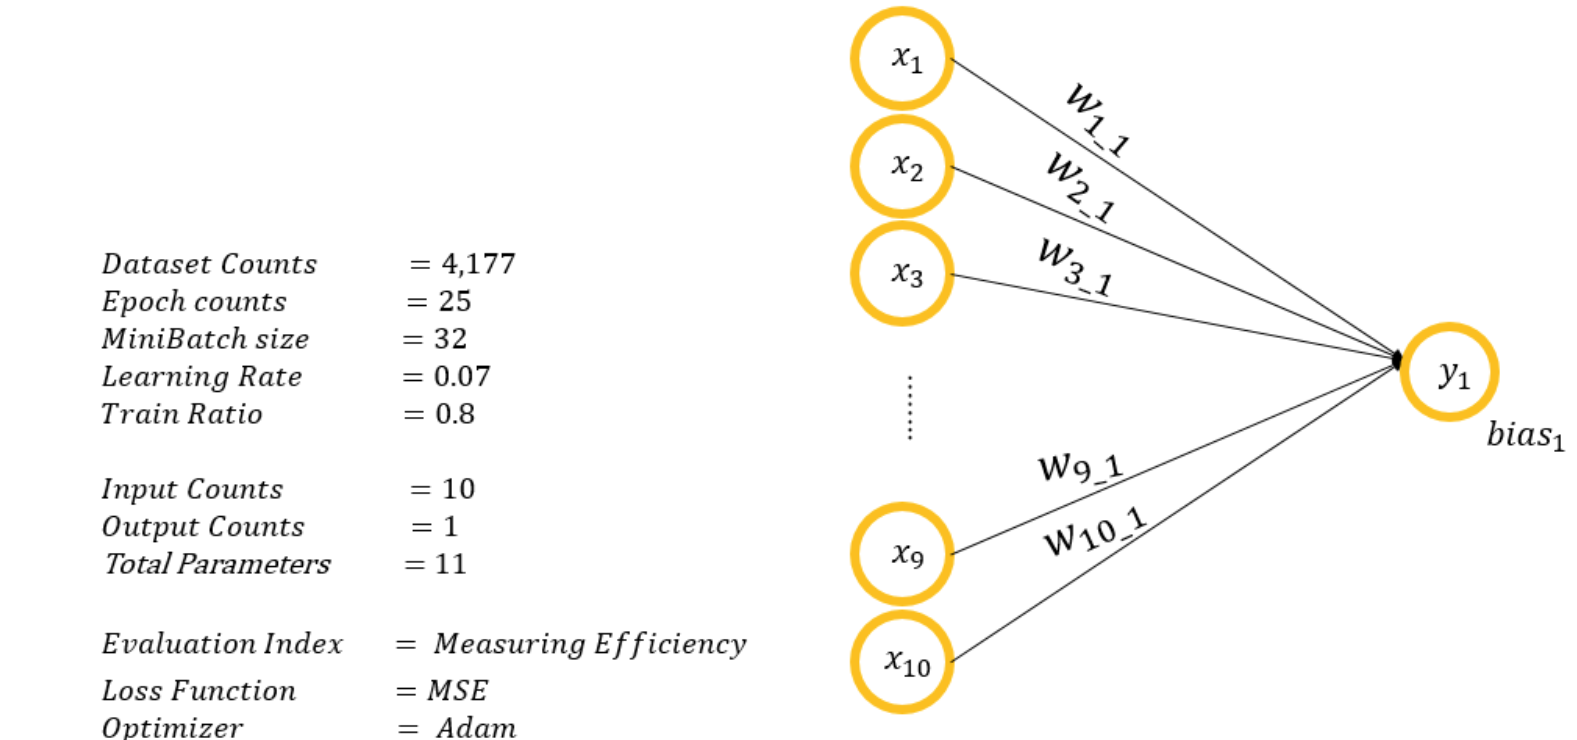

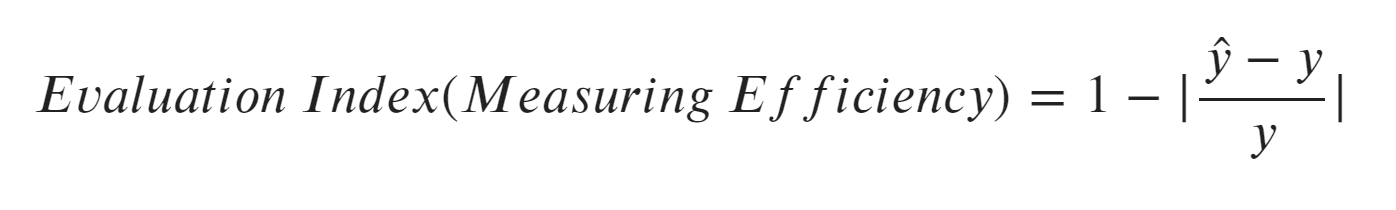

Ï†ïÍ∑úÌôîÌï®Ïàò

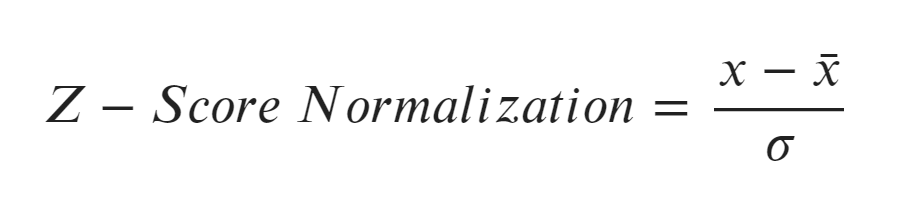

In [ ]:
df = pd.read_csv('/content/abalone.csv')
df.describe()

Length     Diameter  ...  Shell weight        Rings
count  4177.000000  4177.000000  ...   4177.000000  4177.000000
mean      0.523992     0.407881  ...      0.238831     9.933684
std       0.120093     0.099240  ...      0.139203     3.224169
min       0.075000     0.055000  ...      0.001500     1.000000
25%       0.450000     0.350000  ...      0.130000     8.000000
50%       0.545000     0.425000  ...      0.234000     9.000000
75%       0.615000     0.480000  ...      0.329000    11.000000
max       0.815000     0.650000  ...      1.005000    29.000000

[8 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# 2. Î®∏Ïã†Îü¨Îãù

In [ ]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# Í∑∏ÎûòÌîÑÏóê retina display Ï†ÅÏö©
%config InlineBackend.figure_format = 'retina'
 
# Colab Ïùò ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install mglearn

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 542kB 19.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=eb20b09196da8cd4348557cef66537d5056fb34df71ea72755b810f928d254c4
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)
# print(cancer.DESCR)   #description

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


In [ ]:
import numpy as np

# ÏñëÏÑ±Í≥º ÏïÖÏÑ± Îç∞Ïù¥ÌÑ∞Ïùò Ïàò
# zip() : 2Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º Ïó∞Í≤∞
# bincount() : ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàòÎ•º Î∞òÌôò #numpy
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
  print({n:v})

#2. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î∞îÍøîÏÑú valuecountÌïòÎäî Î∞©Î≤ïÏùÑ Îçî ÎßéÏù¥ Ïì∞Í∏¥ Ìï®.

{'malignant': 212}
{'benign': 357}


In [ ]:
# ÌäπÏÑ±Ïùò Î™ÖÏπ≠
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# stratify: default=None ÏûÖÎãàÎã§. classificationÏùÑ Îã§Î£∞ Îïå Îß§Ïö∞ Ï§ëÏöîÌïú ÏòµÏÖòÍ∞íÏûÖÎãàÎã§. 
# stratify Í∞íÏùÑ targetÏúºÎ°ú ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ 
# Í∞ÅÍ∞ÅÏùò class ÎπÑÏú®(ratio)ÏùÑ train / validationÏóê Ïú†ÏßÄÌï¥ Ï§çÎãàÎã§. 
# (Ìïú Ï™ΩÏóê Ïè†Î†§ÏÑú Î∂ÑÎ∞∞ÎêòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§) ÎßåÏïΩ Ïù¥ ÏòµÏÖòÏùÑ ÏßÄÏ†ïÌï¥ Ï£ºÏßÄ ÏïäÍ≥†
#  classification Î¨∏Ï†úÎ•º Îã§Î£¨Îã§Î©¥, ÏÑ±Îä•Ïùò Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇ† Ïàò ÏûàÏäµÎãàÎã§.

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [ ]:
np.bincount(y_train), np.bincount(y_test), np.bincount(cancer.target)

(array([159, 267]), array([53, 90]), array([212, 357]))

Í≥ºÎåÄÏ†ÅÌï©Í≥º Í≥ºÏÜåÏ†ÅÌï©Ïùò ÌäπÏßïÏùÑ Î∞úÍ≤¨ (Ïù¥ÏõÉÏùò ÏàòÍ∞Ä Ï†ÅÏùÑÏàòÎ°ù Î™®Îç∏Ïù¥ Î≥µÏû°Ìï¥ÏßÄÎØÄÎ°ú Í∑∏ÎûòÌîÑÍ∞Ä ÏàòÌèâÏúºÎ°ú Îí§ÏßëÌûå ÌòïÌÉúÍ∞Ä ÎÇòÌÉÄÎÇ®) <br>
Ïù¥ÏõÉÏùò ÏàòÍ∞Ä ÌïòÎÇòÏùº Îïå ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°Ïù¥ ÏôÑÎ≤ΩÌïòÎÇò, Ïù¥ÏõÉÏùò ÏàòÍ∞Ä ÎäòÏñ¥ÎÇòÎ©¥ Î™®Îç∏ÏùÄ Îã®ÏàúÌï¥ÏßÄÍ≥† ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑÎäî Ï§ÑÏñ¥Îì†Îã§.

Ï†ïÌôïÎèÑÍ∞Ä Í∞ÄÏû• Ï¢ãÏùÑ ÎïåÎäî? -> Ï§ëÍ∞ÑÏ†ïÎèÑÏù∏ 6Í∞úÎ•º ÏÇ¨Ïö©ÌñàÏùÑ Í≤ΩÏö∞

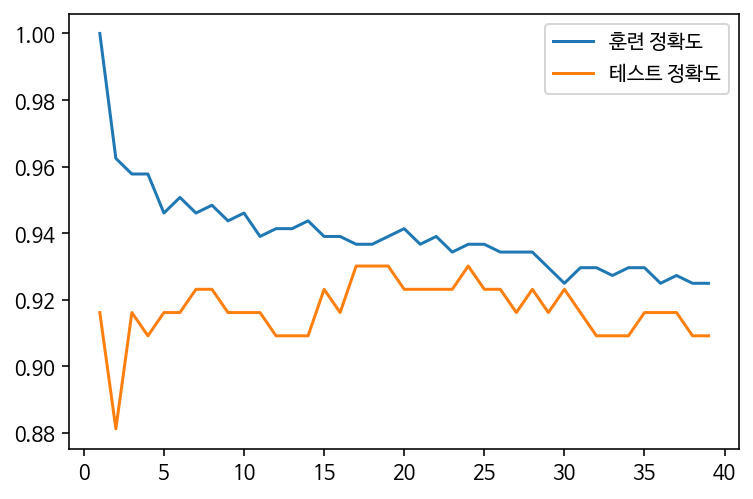

In [ ]:
train_acc = []
test_acc = []

n_neighbors = range(1,40)

for n in n_neighbors:
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X_train, y_train)
  model.score(X_train, y_train)
  train_acc.append(model.score(X_train, y_train))
  test_acc.append(model.score(X_test, y_test))

plt.plot(n_neighbors, train_acc, label = 'ÌõàÎ†® Ï†ïÌôïÎèÑ')
plt.plot(n_neighbors, test_acc, label = 'ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ')
plt.legend()
plt.show()

### K-NN ÌöåÍ∑Ä

k-NNÏùÑ ÌöåÍ∑ÄÏóê ÏÇ¨Ïö©Ìïú Í≤ΩÏö∞
- Ïó¨Îü¨ Í∞úÏùò ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉÏùÑ ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞ÏóêÎäî Ïù¥ÏõÉ Í∞ÑÏùò ÌèâÍ∑†Ïù¥ ÏòàÏ∏° <br> (Î∂ÑÎ•òÏóêÏÑúÎäî Ïù¥ÏõÉÏùò Î†àÏù¥Î∏î Í∞úÏàòÎ•º ÌôïÏù∏Ìï¥ÏÑú Îã§ÏàòÍ≤∞Î°ú Ï†ïÌñàÏßÄÎßå, ÌöåÍ∑ÄÏóêÏÑúÎäî Ïù¥ÏõÉÎì§Ïùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞ÌïúÎã§Îäî Ï†êÏù¥ Ï∞®Ïù¥)

- Î∂ÑÎ•òÎäî Î™®Îç∏Í≥º ÎπÑÍµêÌïòÏó¨ Ïú†ÏÇ¨Ìïú Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò(Î∂àÏó∞ÏÜç)Î°ú ÌåêÎã®ÌïúÎã§Î©¥ ÌöåÍ∑ÄÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†Ïú†ÏÇ¨ÎèÑ (Ïó∞ÏÜçÏ†ÅÏù∏)ÏôÄ Í∞ôÏùÄ ÏàòÏπòÎ°ú ÌåêÎã®

Classification(Î∂ÑÎ•ò)Îäî Ïó∞ÏÜçÏ†ÅÏù¥ÏßÄ ÏïäÏùÄ Î†àÏù¥Î∏î, Îã§Ïãú ÎßêÌï¥ ‚ÄòÎ¨¥Ïóá‚ÄôÏù∏ÏßÄÎ•º ÏòàÏ∏°ÌïòÏßÄÎßå, ÌöåÍ∑Ä(Regression)Îäî Ïó∞ÏÜçÎêú ÏàòÏπò, Ï¶â ‚ÄòÏñºÎßàÎÇò‚ÄôÎ•º ÏòàÏ∏°

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


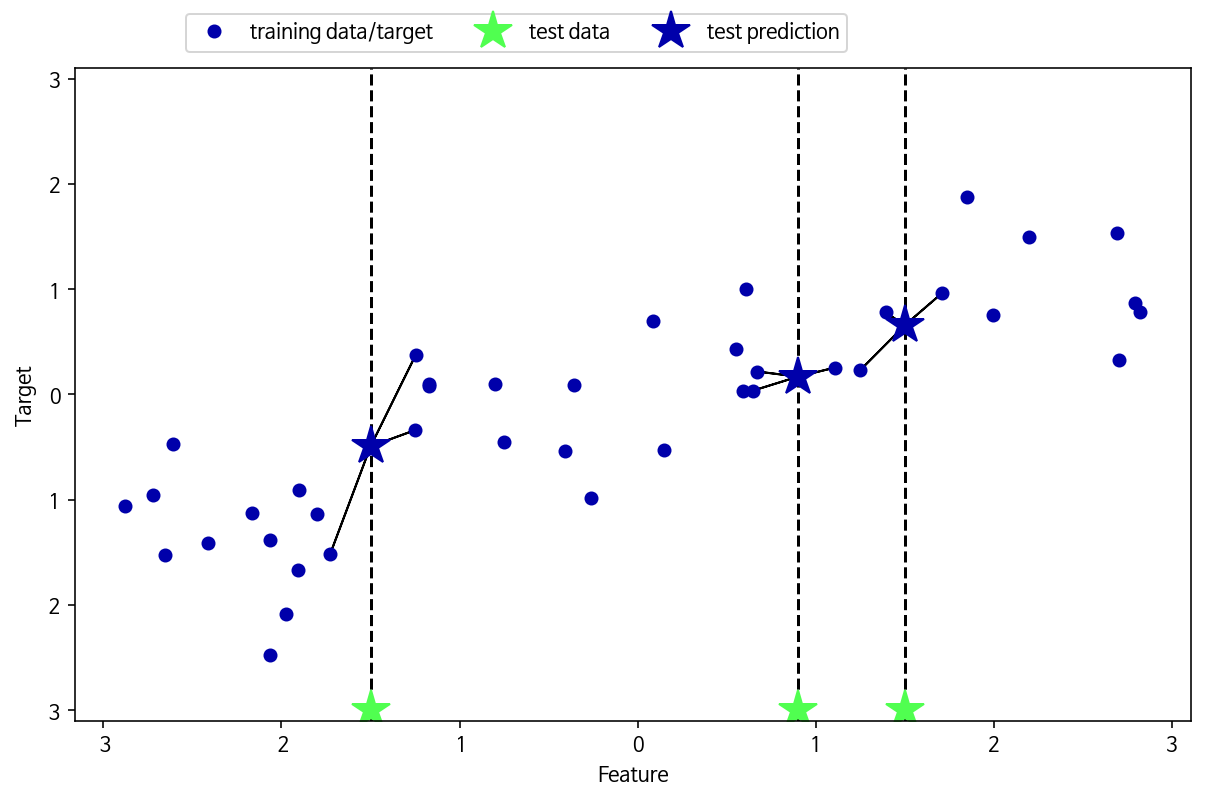

In [ ]:
import mglearn
import matplotlib.pyplot as plt


mglearn.plots.plot_knn_regression(n_neighbors=3)

KNeighborsRegressor()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
model.predict(X_test)

array([-0.04382817, -0.04382817, -0.04382817])

#### K-NN ÌöåÍ∑Ä Ïã§Ïäµ 01

IMDb ÏòÅÌôî Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏

ÌöåÍ∑ÄÏóê ÎåÄÌïú Ïù¥ÏïºÍ∏∞ÎãàÍπå ÎãπÏó∞Ìûà "ÌèâÏù¥ Ï¢ãÎã§" vs "ÌèâÏù¥ ÎÇòÏÅòÎã§" Î†àÏù¥Î∏îÎ°ú Î∂ÑÎ•òÌïòÎäî Í≤å ÏïÑÎãàÎùº <br>
Ïã§Ï†ú IMDb Îì±Í∏â(Î≥ÑÏ†ê)ÏùÑ ÏòàÏ∏°ÌïòÎäî Í≤ÉÏù¥ Í≥ºÏ†úÏùò Î™©Ìëú

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# ÏòÅÌôîÏóê ÎåÄÌïú 3Í∞úÏùò ÌäπÏÑ±
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
# ÏòÅÌôîÏóê ÎåÄÌïú Î≥ÑÏ†ê
y_train = [5.0, 6.8, 9.0]

# ÏΩîÎìúÏûëÏÑ±(Î™®Îç∏)
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
model.fit(X_train, y_train)


# ÏÉàÎ°úÏö¥ ÏòÅÌôî 3Í±¥Ïóê ÎåÄÌï¥ Î≥ÑÏ†êÏùÑ ÏòàÏ∏°
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

# ÏΩîÎìúÏûëÏÑ±(ÏòàÏ∏°)
model.predict(X_test)

array([7.28143288, 7.76451922, 6.8457845 ])

##### weight Í∞ÄÏ§ëÏπò Ìï®Ïàò Ï∂îÍ∞ÄÏÑ§Î™Ö

ÏòàÎ•º Îì§Ïñ¥ 
```
ÏòÅÌôî : A -> Îì±Í∏â: 5.0 , XÍπåÏßÄÏùò Í±∞Î¶¨: 3.2
ÏòÅÌôî : B -> Îì±Í∏â: 6.8 , XÍπåÏßÄÏùò Í±∞Î¶¨: 11.5
ÏòÅÌôî : C -> Îì±Í∏â: 9.0 , XÍπåÏßÄÏùò Í±∞Î¶¨: 1.1
```
Í∞Ä ÏûàÎã§Í≥† Ìï† Îïå 

ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÎ©¥
> (5.0 + 6.8 + 9.0) / 3 = 6.93

Í±∞Î¶¨Ïóê ÎåÄÌïú Í∞ÄÏ§ë ÌèâÍ∑†ÏùÑ Íµ¨Ìï¥Î≥¥Î©¥
> (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) = 7.9

code
```
print( (5.0 + 6.8 + 9.0) / 3 )
print( (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) )
Ï∂úÎ†•
6.933333333333334
7.898546346988861
```

# ÏßÄÎèÑÌïôÏäµ - ÏÑ†ÌòïÌöåÍ∑Ä (Linear Regression)

ÌöåÍ∑Ä Î™®Îç∏Ïù¥ÎûÄ?

- Ïñ¥Îñ§ ÏûêÎ£åÏóê ÎåÄÌï¥ÏÑú Í∑∏ Í∞íÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Ï°∞Í±¥ÏùÑ Í≥†Î†§ÌïòÏó¨ Íµ¨Ìïú ÌèâÍ∑† <br>
(Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ ÍµâÏû•Ìûà ÌÅ¨Í±∞ÎÇò ÏûëÏùÑÏßÄÎùºÎèÑ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïù¥ Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ Ï†ÑÏ≤¥ ÌèâÍ∑†ÏúºÎ°ú ÌöåÍ∑ÄÌïòÎ†§Îäî ÌäπÏßïÏù¥ ÏûàÎã§Îäî ÌÜµÍ≥ÑÌïô Í∏∞Î≤ï)
- \\( y = h(x_1, x_2, x_3, ..., x_k; W_1, W_2, W_3, ..., W_k) + \epsilon \\)

 - h() : Ï°∞Í±¥Ïóê Îî∞Î•∏ ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÎäî Ìï®Ïàò (ÌöåÍ∑Ä Î™®Îç∏)
 - x : Ïñ¥Îñ§ Ï°∞Í±¥(ÌäπÏÑ±)
 - W : Í∞Å Ï°∞Í±¥Ïùò ÏòÅÌñ•Î†•(Í∞ÄÏ§ëÏπò)
 - e : ‚ÄòÏò§Ï∞®Ìï≠‚ÄôÏùÑ ÏùòÎØ∏. Îã§ÏñëÌïú ÌòÑÏã§Ï†ÅÏù∏ ÌïúÍ≥ÑÎ°ú Ïù∏Ìï¥ Î∞úÏÉùÌïòÎäî Î∂àÌôïÏã§ÏÑ±ÏúºÎ°ú ÏùºÏ¢ÖÏùò Ïû°Ïùå(noise)

ÏÑ†Ìòï Î™®Îç∏Ïù¥ÎûÄ?

- ÏûÖÎ†• ÌäπÏÑ±Ïóê ÎåÄÌïú ÏÑ†Ìòï Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ ÏòàÏ∏°ÏùÑ ÏàòÌñâ

- Îã§ÏñëÌïú ÏÑ†Ìòï Î™®Îç∏Ïù¥ Ï°¥Ïû¨

- Î∂ÑÎ•òÏôÄ ÌöåÍ∑ÄÏóê Î™®Îëê ÏÇ¨Ïö© Í∞ÄÎä•


<center>

ÏãúÌóòÏÑ±Ï†Å Îç∞Ïù¥ÌÑ∞

|X ( ÌïôÏäµ ÏãúÍ∞Ñ )| Y ( ÏãúÌóò Ï†êÏàò )|
|---|---|
|9 |90|
|8 |80|
|4| 40|
|2| 20|

7ÏãúÍ∞Ñ Í≥µÎ∂Ä Ìï† Í≤ΩÏö∞ ÏÑ±Ï†ÅÏùÄ?
</center>



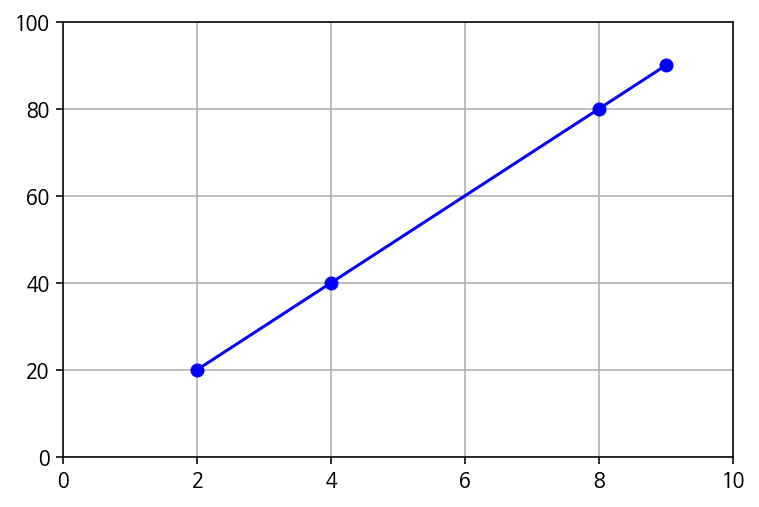

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [9, 8, 4, 2]
y = [90, 80, 40, 20]
plt.xlim(0,10)
plt.ylim(0,100)
plt.plot(x,y, 'b-o')
plt.grid()

 \\( y=ax+b \\)

 - a : Í∏∞Ïö∏Í∏∞
 - b : Ï†àÌé∏


<center>

ÏãúÌóòÏÑ±Ï†Å Îç∞Ïù¥ÌÑ∞

|X ( ÌïôÏäµ ÏãúÍ∞Ñ )| Y ( ÏãúÌóò Ï†êÏàò )|
|---|---|
|8 |97|
|6 |91|
|4| 93|
|2| 81|

7ÏãúÍ∞Ñ Í≥µÎ∂Ä Ìï† Í≤ΩÏö∞ ÏÑ±Ï†ÅÏùÄ?
</center>


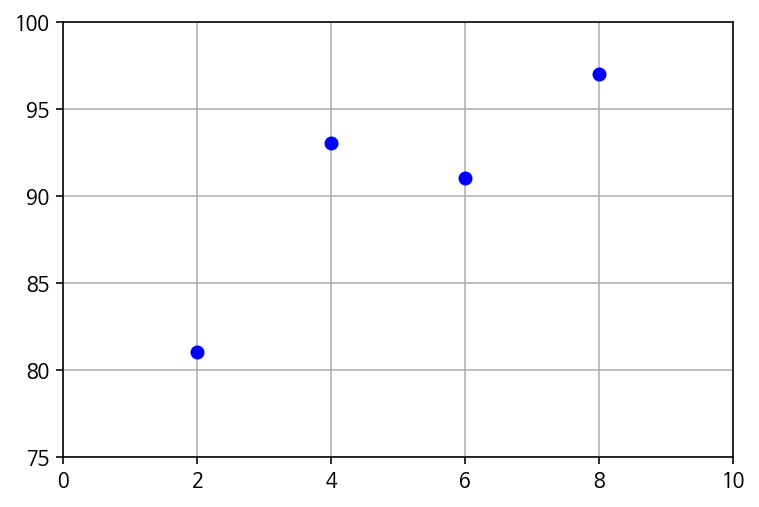

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [8, 6, 4, 2]
y = [97, 91, 93, 81]
plt.xlim(0,10)
plt.ylim(75,100)
plt.plot(x,y, 'bo')
plt.grid()

 \\( y=ax+b \\)

 - a : Í∏∞Ïö∏Í∏∞
 - b : Ï†àÌé∏

ÏµúÏÜåÏ†úÍ≥±Î≤ï

> \\( a=\frac { (x-xÌèâÍ∑†)(y-yÌèâÍ∑†)Ïùò Ìï© }{ { (x-xÌèâÍ∑†) }^{ 2 }Ïùò Ìï© }  \\)

- Í≥µÎ∂ÄÌïú ÏãúÍ∞Ñ(x)Ïùò ÌèâÍ∑†: (2+4+6+8) / 4 = 5
- ÏÑ±Ï†Å(y)Ïùò ÌèâÍ∑†: (81+93+91+97) / 4 = 90.5

> \\( b=yÏùò ÌèâÍ∑†- (xÏùò ÌèâÍ∑† \times Í∏∞Ïö∏Í∏∞ a) \\)

- b = 90.5 - (2.3 x 5) = 79


In [ ]:
a = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) )  /  ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1 = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) ) 
a2 = ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1, a2, a

(46.0, 20, 2.3)

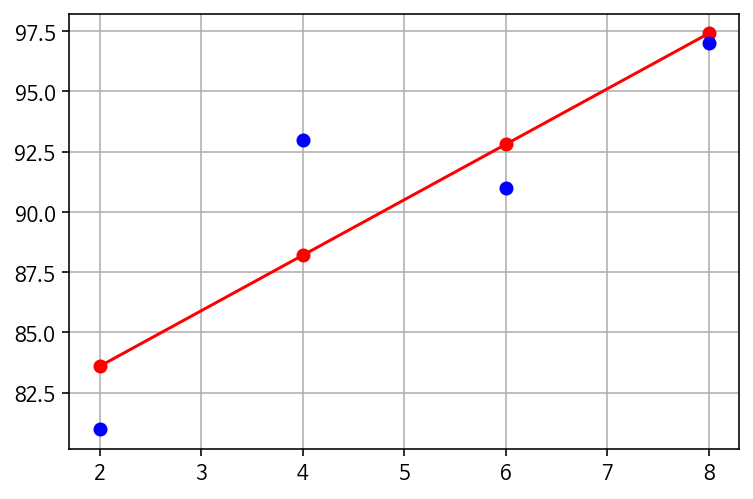

In [ ]:
# Ïò§Ï∞®Í∞Ä ÏµúÏ†ÄÍ∞Ä ÎêòÎäî ÏßÅÏÑ†
import numpy as np
# Í∏∞Ïö∏Í∏∞ aÎ•º ÏµúÏÜåÏ†úÍ≥±Î≤ïÏúºÎ°ú Íµ¨ÌïòÎäî Ìï®Ïàò
def compute_a(x, y, mean_x, mean_y):
  #Î∂ÑÏûêÎ∂ÄÎ∂Ñ :
  dc = 0
  for i in range(len(x)):
    dc += (x[i] - mean_x) * (y[i] - mean_y)


  #Î∂ÑÎ™®Î∂ÄÎ∂Ñ :
  divisor = 0
  for i in range(len(x)):
    divisor += (x[i]-mean_x)**2
  
  a = dc / divisor
  return a

x = [8, 6, 4, 2]
y = [97, 91, 93, 81]
mean_x = np.mean(x)
mean_y = np.mean(y)
a = compute_a(x, y, mean_x, mean_y)
b = mean_y - (mean_x * a)

y_pred = [ a * x1 + b for x1 in x]

plt.plot(x, y_pred, 'r-o')
plt.plot(x, y, 'bo')
plt.grid()
plt.show()

## ÏÑ†ÌòïÌöåÍ∑Ä(Linear Regression) <br>
 ÎòêÎäî ÏµúÏÜåÏ†úÍ≥±Î≤ï(Ordinary Least Squares)

- Ï¢ÖÏÜçÎ≥ÄÏàò(ÏùëÎãµÎ≥ÄÏàò) yÏôÄ Ìïú Í∞ú Ïù¥ÏÉÅÏùò ÎèÖÎ¶ΩÎ≥ÄÏàò(ÏûÖÎ†•Î≥ÄÏàò) xÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î™®Îç∏ÎßÅÌïú Í≤É

 >  \\( y=Wx+b \\)  
  - (W : Í∞ÄÏ§ëÏπò, b : Ìé∏Ìñ•(bias))

 > \\( H(x)=Wx+b \\)  
  - H(x) : Linear ÌïòÍ≤å Hypothesis(Í∞ÄÏÑ§)ÏùÑ ÏÑ∏Ïö¥Îã§Îäî Í≤É
  - Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏû• Ïûò ÎåÄÎ≥ÄÌï† Ïàò ÏûàÎäî H(x)Ïùò WÏôÄ bÎ•º Ï†ïÌïòÎäî Í≤ÉÏù¥ Linear RegressionÏùò Î™©Ï†Å

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


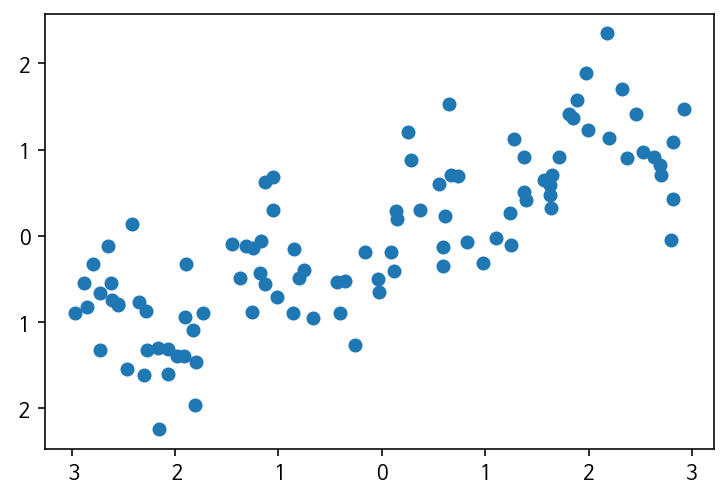

In [ ]:
import numpy as np
import mglearn

X, y = mglearn.datasets.make_wave(100)
plt.scatter(X, y)
plt.show()

w[0]: 0.393906  b: -0.031804


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


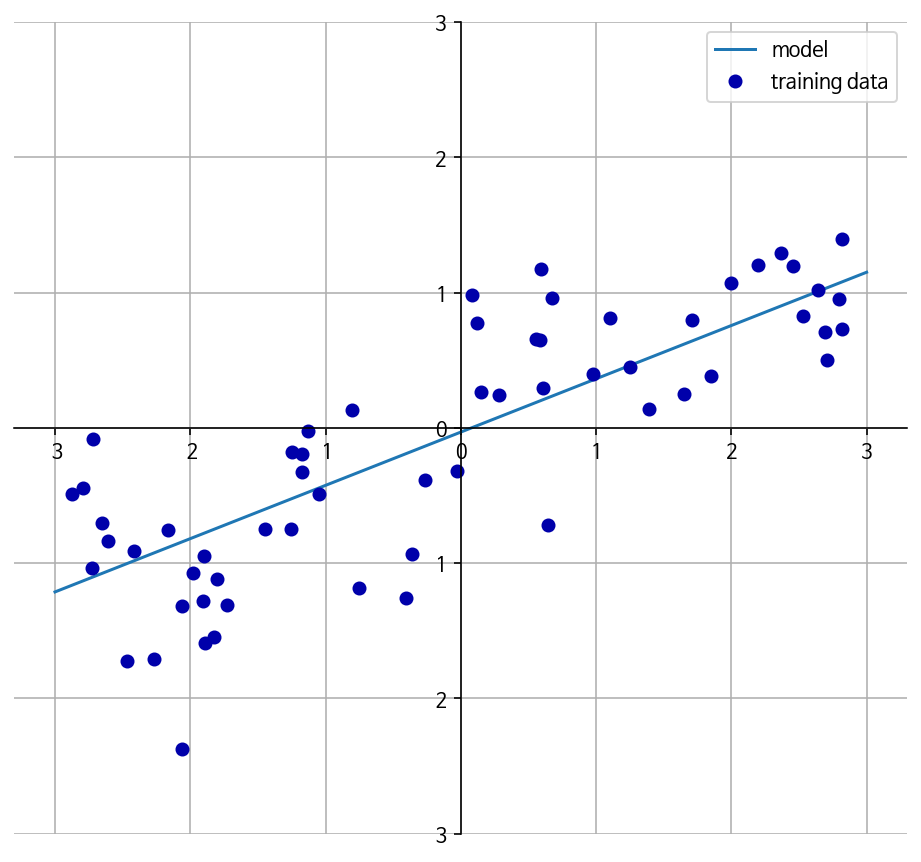

In [ ]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

- ÎπÑÏö©Ìï®Ïàò (Cost / Cost function) : Í∑∏Î†§ÏßÑ ÏßÅÏÑ† Hypothesis(H(x))ÏôÄ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞(y)Ïùò Ï∞®Ïù¥

  - Cost = H(x) - yÏóê Îç∞Ïù¥ÌÑ∞Î•º ÎåÄÏûÖÌïòÏó¨ CostÏùò Ï¥ùÌï©ÏùÑ Íµ¨ÌïòÎäî Í≤ÉÏù¥ Í∞ÄÎä•
  - CostÏùò Ï¥ùÌï©Ïù¥ ÏûëÏùÄ HypothesisÏùºÏàòÎ°ù Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÎåÄÎ≥ÄÌïòÎäî ÌõåÎ•≠Ìïú Linear Regression
  - CostÎäî ÏñëÏàòÏùº ÏàòÎèÑ, ÏùåÏàòÏùº ÏàòÎèÑ ÏûàÍ∏∞Ïóê Ïù¥Îü¨Ìïú Î¨∏Ï†úÎ•º Î∞©ÏßÄÌïòÍ≥†Ïûê Ï¥ùÌï©ÏùÑ Íµ¨Ìï† Îïå CostÍ∞íÏùÑ Ï†úÍ≥±ÌïòÏó¨ ÌèâÍ∑†ÏùÑ ÎÇ¥Îäî Î∞©Ïãù(ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®, MSE, Mean Squared Error)ÏùÑ ÏÇ¨Ïö©
  >  \\( cost(W,b)=\cfrac { 1 }{ m } \sum _{ i=1 }^{ m } { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 }  \\)

   > \\( H(x)=Wx+b \\)  

 - Î®∏Ïã†Îü¨Îãù(or Îî•Îü¨Îãù)ÏóêÏÑú learningÏùò Î™©Ï†ÅÏùÄ CostÎ•º Ï†ïÏùòÌïòÍ≥† Ïù¥Î•º ÏµúÏÜåÌôîÌïòÎäî Í≤É

#### ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞® (MSE, Mean Squared Error) - ÏûòÎ™ªÍ∑∏ÏùÄ ÏÑ† Î∞îÎ°úÏû°Í∏∞

- Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏùò Ï∞®Ïù¥Î•º Î∂ÑÏÑùÌïòÍ∏∞ ÏúÑÌïú Í≤É
- ÏùåÏàòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞ Ïò§Ï∞®Í∞Ä Ï§ÑÏñ¥ÎìúÎäî Î¨∏Ï†ú -> ÏûêÏäπÏùÑ Ï∑®Ìï®
- ÌèâÍ∑†Ïò§Ï∞®Í∞Ä ÏûêÏäπÏúºÎ°ú Ïù∏Ìï¥ Ïª§ÏßÄÎäî Î¨∏Ï†ú -> Ï†úÍ≥±Í∑ºÏùÑ Ï∑®Ìï®

|x(hour) | y(score)|
|---|---|
|0|0|
|1|1|
|2|2|
|3|3|

\\( H(x)=1 \times  x+0 \\)  

\\( H(x)=0.5 \times x+0 \\)  

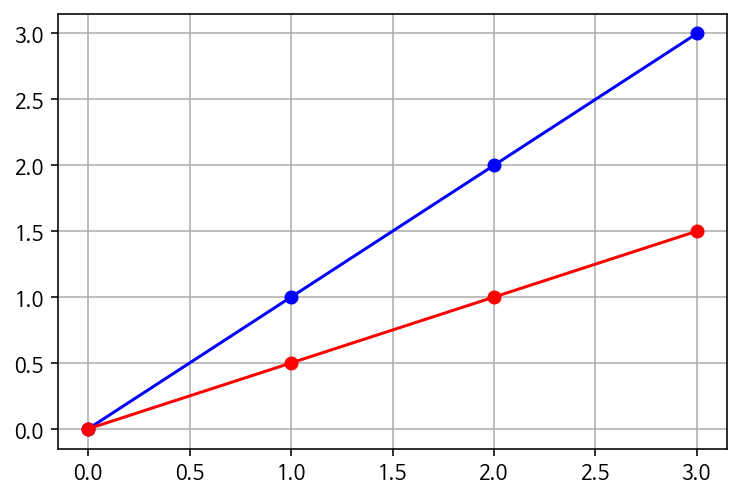

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# Í∞ÄÏ§ëÏπò(Í≥ÑÏàò) Î∞è Ìé∏Ìñ•(Ï†àÌé∏)
w = 1
b = 0
y_pred1 = w * x + b
plt.plot(x, y_pred1, 'b-o')

w = 0.5
b = 0
y_pred2 = w * x + b
plt.plot(x, y_pred2, 'r-o')

plt.grid()
plt.show()

#### ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞® (MSE, Mean Squared Error) Ïó∞Ïäµ 01
Í∞ÄÏÑ§Ïùò MSE Í∞íÏùÑ Í≥ÑÏÇ∞Ìï¥Î≥¥Ïûê.


\\( \cfrac { { (H({ x }^{ (1) })-{ y }^{ (1) }) }^{ 2 } + { (H({ x }^{ (2) })-{ y }^{ (2) }) }^{ 2 }+ { (H({ x }^{ (3) })-{ y }^{ (3) }) }^{ 2 }+ { (H({ x }^{ (4) })-{ y }^{ (4) }) }^{ 2 } }{ 4 } = ? \\)

In [ ]:
# y_pred(ÏòàÏ∏°Í∞í), y(Ïã§Ï†úÍ∞í)
def MSE(y_pred, y):
  cost = np.sum((y_pred - y)**2) / len(y)
  return cost

MSE(y_pred1, y)     #0.0
MSE(y_pred2, y)     #0.875

0.875

# 3. ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

### ÌôïÎ•†
#### ÌôïÎ•†Ïùò Ï†ïÏùò
* ÏãúÌñâÍ≥º ÏÇ¨Í±¥
  - ÏÇ¨Í±¥, ÌëúÎ≥∏Í≥µÍ∞Ñ(S)
    - Í∑ºÏõêÏÇ¨Í±¥ : ÌïòÎÇòÏùò Í∞íÎßåÏù¥ ÎÇòÏò§Îäî ÏÇ¨Í±¥
    - AND, OR, NOT : ÍµêÏßëÌï©, Ìï©ÏßëÌï©, Ï∞®ÏßëÌï©
    - Î∞∞Î∞òÏÇ¨Í±¥, Ïó¨ÏÇ¨Í±¥

* ÏàòÌïôÏ†Å ÌôïÎ•†Ïùò Ï†ïÏùò : NÏù¥ Ìïú ÏãúÌñâÏóê Îî∞ÎùºÏÑú ÏùºÏñ¥ÎÇ† Ïàò ÏûàÎäî Î™®Îì† Í≤ΩÏö∞Ïùò Ïàò.
NaÏù¥ ÏÇ¨Í±¥ AÍ∞Ä ÏùºÏñ¥ÎÇòÎäî Í≤ΩÏö∞Ïùò ÏàòÏùº Îïå ÏàòÌïôÏ†Å ÌôïÎ•†(P(A) = Na/N)  

* ÌôïÎ•†Ïùò Í∏∞Î≥∏ÏÑ±Ïßà
  - ÏûÑÏùòÏùò ÏÇ¨Í±¥ AÏóê ÎåÄÌïú ÌôïÎ•†ÏùÄ   
  0 <= P(A) <=1 ÏùÑ Ï∂©Ï°±ÌïúÎã§.
  - Í∑ºÏõêÏÇ¨Í±¥Ïùò ÌôïÎ•† piÎ•º Î™®Îëê ÎçîÌïòÎ©¥ 1Ïù¥ ÎêòÏñ¥Ïïº ÌïúÎã§.   
  Ï¶â, ÌëúÎ≥∏Í≥µÍ∞Ñ SÏóê ÎåÄÌïú ÌôïÎ•† P(S) = 1Ïù¥Îã§.

* ÌÜµÍ≥ÑÏ†Å(Í≤ΩÌóòÏ†Å) ÌôïÎ•†Ïùò Ï†ïÏùò
  - Ïñ¥Îñ§ Ï°∞Í±¥ ÏïÑÎûòÏóêÏÑú Ïã§Ìóò ÎòêÎäî Í¥ÄÏ∏°Ìïú ÏûêÎ£åÏùò Ï¥ùÏàòÎ•º NÏù¥Îùº ÌïòÍ≥†, Í∑∏ Ï§ëÏóêÏÑú Ïñ¥Îñ§ ÏÇ¨Í±¥ AÍ∞Ä ÏùºÏñ¥ÎÇú ÌöüÏàòÎ•º ùëÅùê¥Îùº Ìï† Îïå ÏÉÅÎåÄÎèÑÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï†ïÏùòÌïúÎã§:  
ÏÉÅÎåÄÎèÑÏàò = ùëÅùê¥ / N
  - Í∑∏Îü¨Î©¥ ÏÇ¨Í±¥ AÍ∞Ä ÏùºÏñ¥ÎÇ† ÌÜµÍ≥ÑÏ†Å ÌôïÎ•†ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏù¥ ÏÉÅÎåÄÎèÑÏàòÏùò Í∑πÌïúÏù¥Îã§.  
  ÌÜµÍ≥ÑÏ†Å ÌôïÎ•† = lim(ùëÅ‚Üí‚àû) NA/N




#### ÌôïÎ•†Ïùò ÎçßÏÖà
* OR  
P( ùê¥ ‚à™ ùêµ )= ùëÉ (ùê¥) + ùëÉ(ùêµ) ‚àí ùëÉ(ùê¥ ‚à© ùêµ)
* ÎßåÏïΩ AÏôÄ BÍ∞Ä ÎèôÏãúÏóê ÏùºÏñ¥ÎÇ† Ïàò ÏóÜÎäî 'Î∞∞Î∞òÏÇ¨Í±¥'Ïù∏ Í≤ΩÏö∞, ùëÉ(ùê¥ ‚à© ùêµ) = 0 Ïù¥Î©∞  
ùëÉ (ùê¥ ‚à™ ùêµ) = ùëÉ (ùê¥) + ùëÉ (B)

#### ÌôïÎ•†Ïùò Í≥±ÏÖà
* Ï°∞Í±¥Î∂Ä ÌôïÎ•† (Conditional Probability)
  - ÌôïÎ•†Ïù¥ 0Ïù¥ ÏïÑÎãå ÏÇ¨Í±¥ AÏôÄ BÏóê ÎåÄÌï¥ÏÑú ÏÇ¨Í±¥ AÍ∞Ä ÏùºÏñ¥ÎÇ¨Îã§Îäî Ï†ÑÏ†úÎ°ú ÏÇ¨Í±¥ BÍ∞Ä ÏùºÏñ¥ÎÇ† ÌôïÎ•†ÏùÑ Ï°∞Í±¥Î∂Ä ÌôïÎ•†Ïù¥Îùº Î∂ÄÎ•¥Î©∞ ùëÉ(ùêµ|ùê¥)ÏôÄ Í∞ôÏù¥ ÌëúÍ∏∞ÌïúÎã§.   
  ùëÉ(ùêµ|ùê¥) = ùëÉ(ùê¥ ‚à© ùêµ) / ùëÉ(ùê¥)  
  ùëÉ(ùê¥ ‚à© ùêµ) = ùëÉ(ùêµ|ùê¥) ùëÉ(ùê¥)= ùëÉ(ùê¥|ùêµ) ùëÉ(B)

* Î≤†Ïù¥Ï¶à Ï†ïÎ¶¨ : ÌôïÎ•†Ïùò Í≥±ÏÖàÏ†ïÎ¶¨Î•º Ïù¥Ïö©ÌïòÏó¨ Î≤†Ïù¥Ï¶à Ï†ïÎ¶¨Î•º ÎèÑÏ∂úÌï¥ ÎÇº Ïàò ÏûàÎã§.  
  ùëÉ(ùê¥|ùêµ) ùëÉ(ùêµ) = ùëÉ(ùêµ|ùê¥) ùëÉ(ùê¥)
  



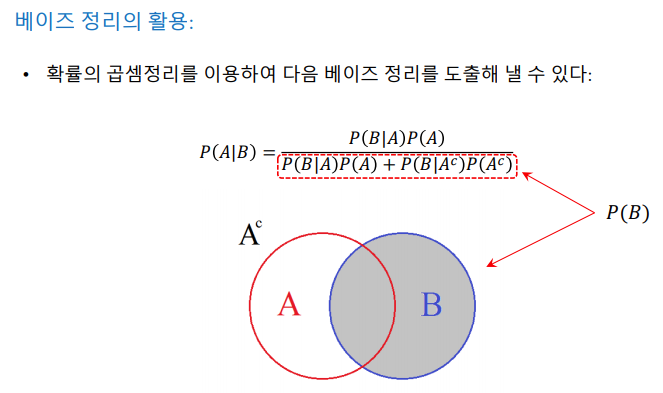

# 4. Ï∑®ÏóÖÎ©òÌÜ†ÎßÅ

ÎßåÎì§Í≥† Ïã∂ÏùÄÍ±∞..?  
ÌôàÌéòÏù¥ÏßÄ?

